In [44]:
from google.colab import drive
drive.mount('/content/practice')

Drive already mounted at /content/practice; to attempt to forcibly remount, call drive.mount("/content/practice", force_remount=True).


In [45]:
import numpy as np # linear algebra
import pandas as pd
df = pd.read_csv('practice/My Drive/Marketing campaign dataset.csv')

In [46]:
# Display the first few rows
print("First 5 rows of the dataset:")
print(df.head())

First 5 rows of the dataset:
   campaign_item_id  no_of_days        time  ext_service_id ext_service_name  \
0              2733           7  2022-05-01             128     Facebook Ads   
1              2733           8  2022-05-02              16            DV360   
2              2733           9  2022-05-03             128     Facebook Ads   
3              2733          10  2022-05-04             128     Facebook Ads   
4              2733          11  2022-05-05               4       Google Ads   

   creative_id  creative_width  creative_height  \
0         1000           300.0            250.0   
1         1000           300.0            250.0   
2         1000           300.0            250.0   
3         1000           300.0            250.0   
4         1000           300.0            250.0   

                          search_tags  template_id  ... exchange_rate  \
0                     #The Power of X         90.0  ...             1   
1                      #Be Bold. Be X

In [47]:
# Get basic information about the dataset
print("\nDataset Information:")
print(df.info())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72612 entries, 0 to 72611
Data columns (total 35 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   campaign_item_id     72612 non-null  int64  
 1   no_of_days           72612 non-null  int64  
 2   time                 72612 non-null  object 
 3   ext_service_id       72612 non-null  int64  
 4   ext_service_name     72612 non-null  object 
 5   creative_id          72612 non-null  int64  
 6   creative_width       69200 non-null  float64
 7   creative_height      69200 non-null  float64
 8   search_tags          72612 non-null  object 
 9   template_id          69200 non-null  float64
 10  landing_page         72612 non-null  object 
 11  advertiser_id        72612 non-null  int64  
 12  advertiser_name      72612 non-null  object 
 13  network_id           72612 non-null  int64  
 14  approved_budget      72206 non-null  float64
 15  advertiser_cur

In [48]:
# Statistical summary of numerical columns
print("\nStatistical Summary:")
print(df.describe())


Statistical Summary:
       campaign_item_id    no_of_days  ext_service_id   creative_id  \
count      72612.000000  72612.000000    72612.000000  72612.000000   
mean        3130.143282     27.036344       49.449127   7450.124842   
std          142.154918     25.479175       55.881324   4062.384982   
min         2733.000000      0.000000        4.000000   1000.000000   
25%         3148.000000      9.000000        4.000000   3725.000000   
50%         3173.000000     19.000000       16.000000   7855.000000   
75%         3202.000000     37.000000      128.000000  10995.000000   
max         3960.000000    118.000000      128.000000  15605.000000   

       creative_width  creative_height   template_id  advertiser_id  \
count    69200.000000     69200.000000  69200.000000   72612.000000   
mean       267.810694       223.175578     83.082659    6195.862213   
std         92.848075        77.373396     20.847618     387.864576   
min          0.000000         0.000000     23.000000  

In [49]:
# Check for missing values
print("\nMissing Values in Each Column:")
missing_values = df.isnull().sum()
print(missing_values)


Missing Values in Each Column:
campaign_item_id           0
no_of_days                 0
time                       0
ext_service_id             0
ext_service_name           0
creative_id                0
creative_width          3412
creative_height         3412
search_tags                0
template_id             3412
landing_page               0
advertiser_id              0
advertiser_name            0
network_id                 0
approved_budget          406
advertiser_currency        0
channel_id                 0
channel_name               0
max_bid_cpm            65206
network_margin             0
campaign_budget_usd        0
impressions                0
clicks                     0
stats_currency             0
currency_code              0
exchange_rate              0
media_cost_usd             0
position_in_content    72612
unique_reach           72612
total_reach            72612
search_tag_cat             0
cmi_currency_code          0
timezone                   0
weekday_cat

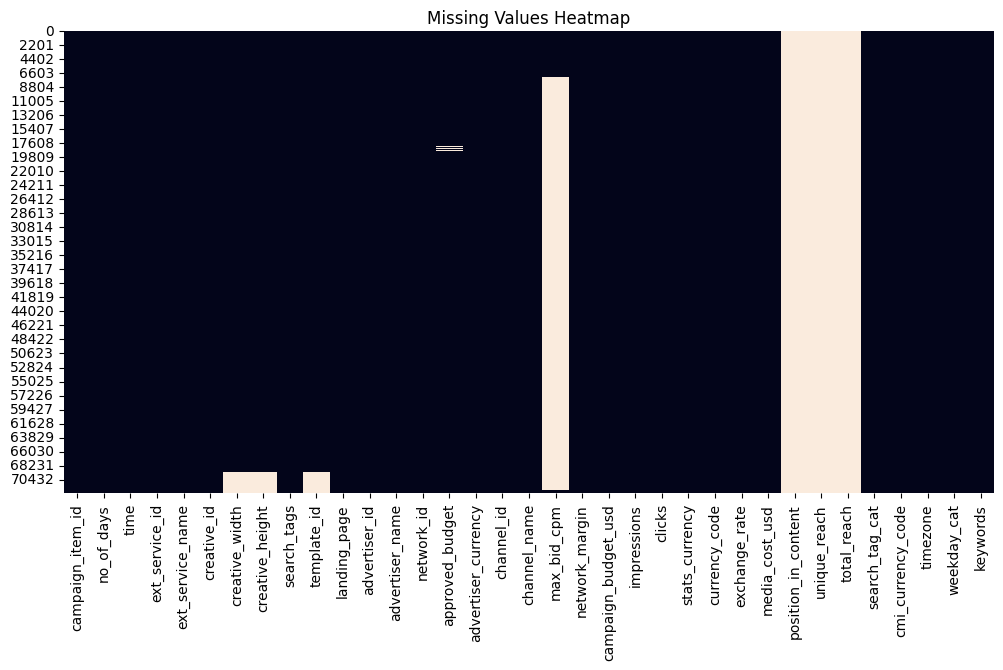

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
# Visualize missing values
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False)
plt.title('Missing Values Heatmap')
plt.show()

In [51]:
# Handle missing values
# For numerical columns, fill missing values with median
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in num_cols:
    #df[col].fillna(df[col].median(), inplace=True)
    df.fillna({col:df[col].median()}, inplace=True)

In [52]:
# For categorical columns, fill missing with mode
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    #df[col].fillna(df[col].mode()[0], inplace=True)
    df.fillna({col:df[col].mode()[0]}, inplace=True)

In [53]:
# Verify missing values are handled
print("\nMissing Values After Imputation:")
print(df.isnull().sum())


Missing Values After Imputation:
campaign_item_id           0
no_of_days                 0
time                       0
ext_service_id             0
ext_service_name           0
creative_id                0
creative_width             0
creative_height            0
search_tags                0
template_id                0
landing_page               0
advertiser_id              0
advertiser_name            0
network_id                 0
approved_budget            0
advertiser_currency        0
channel_id                 0
channel_name               0
max_bid_cpm                0
network_margin             0
campaign_budget_usd        0
impressions                0
clicks                     0
stats_currency             0
currency_code              0
exchange_rate              0
media_cost_usd             0
position_in_content    72612
unique_reach           72612
total_reach            72612
search_tag_cat             0
cmi_currency_code          0
timezone                   0
weekday_c

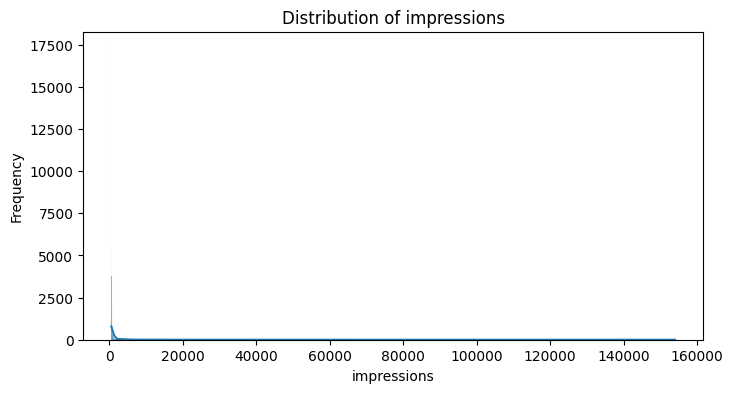

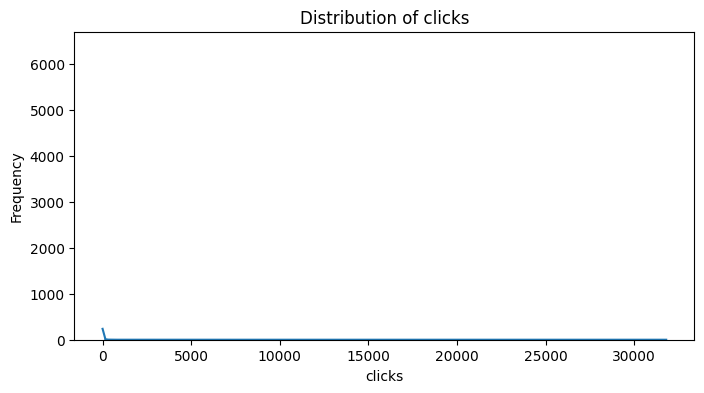

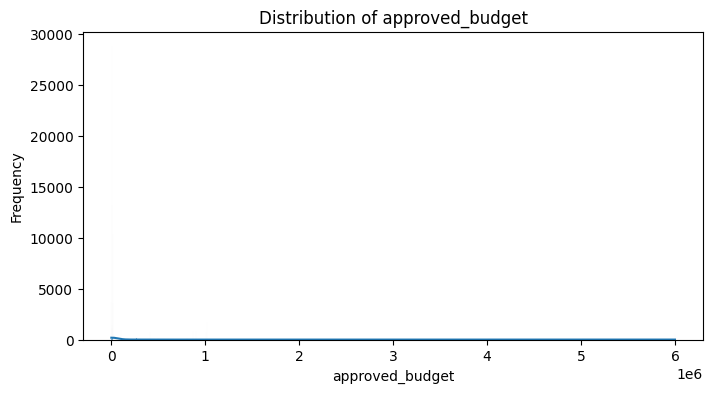

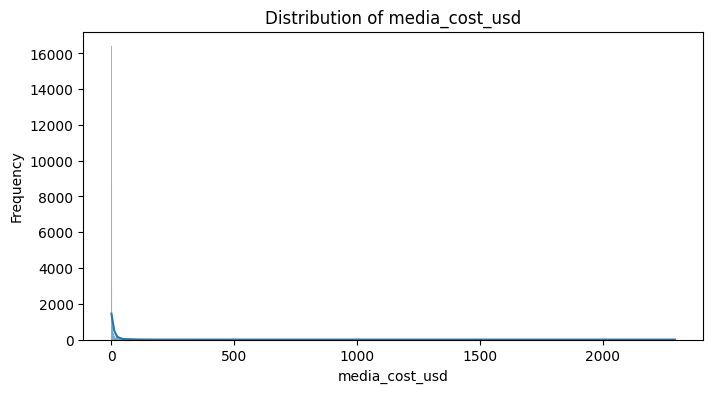

In [54]:
# Exploratory Visualizations

# Distribution of numerical variables
num_vars = ['impressions', 'clicks', 'approved_budget', 'media_cost_usd']
for col in num_vars:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

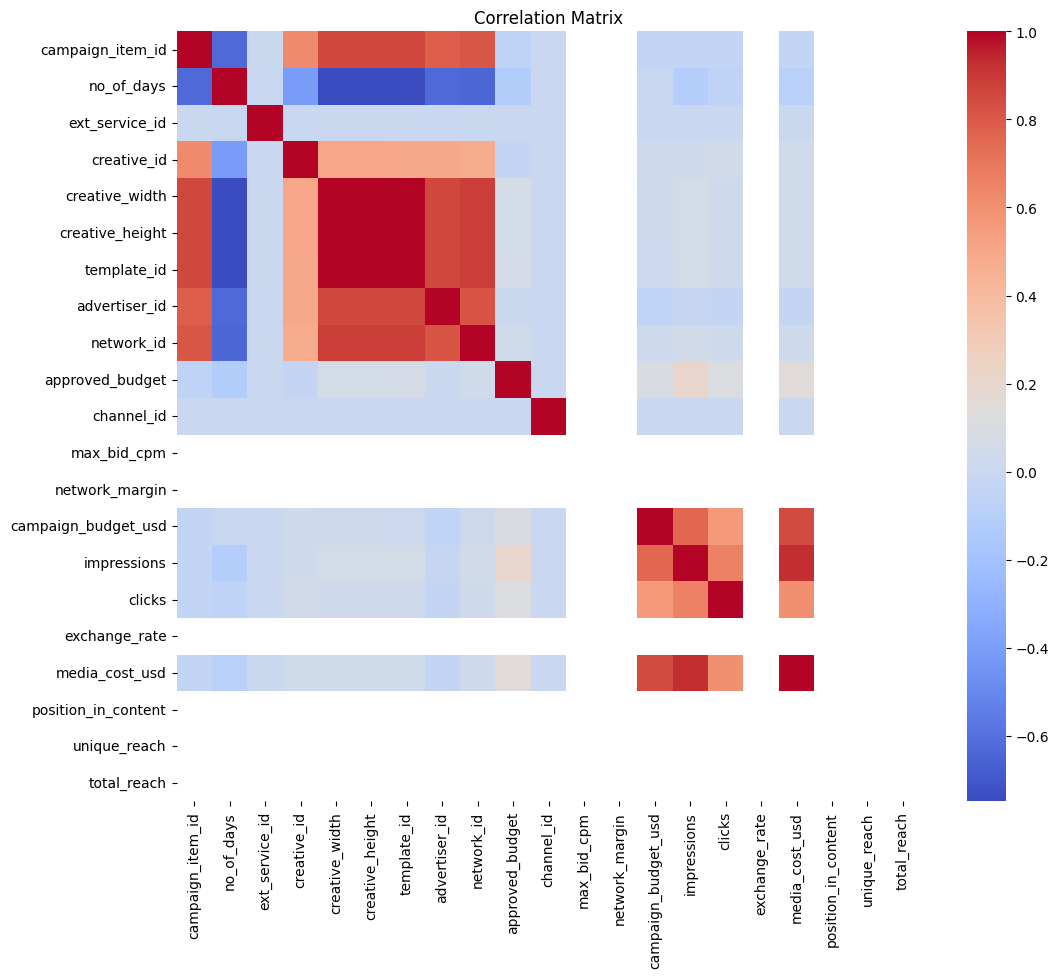

In [55]:
# Correlation Matrix
numerical_cols = df.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(12, 10))
corr = numerical_cols.corr()
sns.heatmap(corr, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

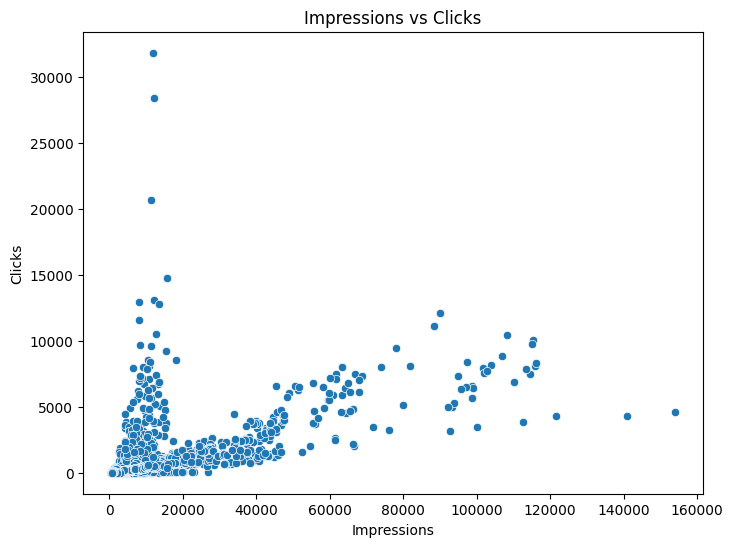

In [56]:
# Analyze relationships between variables
# Scatter plot between impressions and clicks
plt.figure(figsize=(8, 6))
sns.scatterplot(x='impressions', y='clicks', data=df)
plt.title('Impressions vs Clicks')
plt.xlabel('Impressions')
plt.ylabel('Clicks')
plt.show()

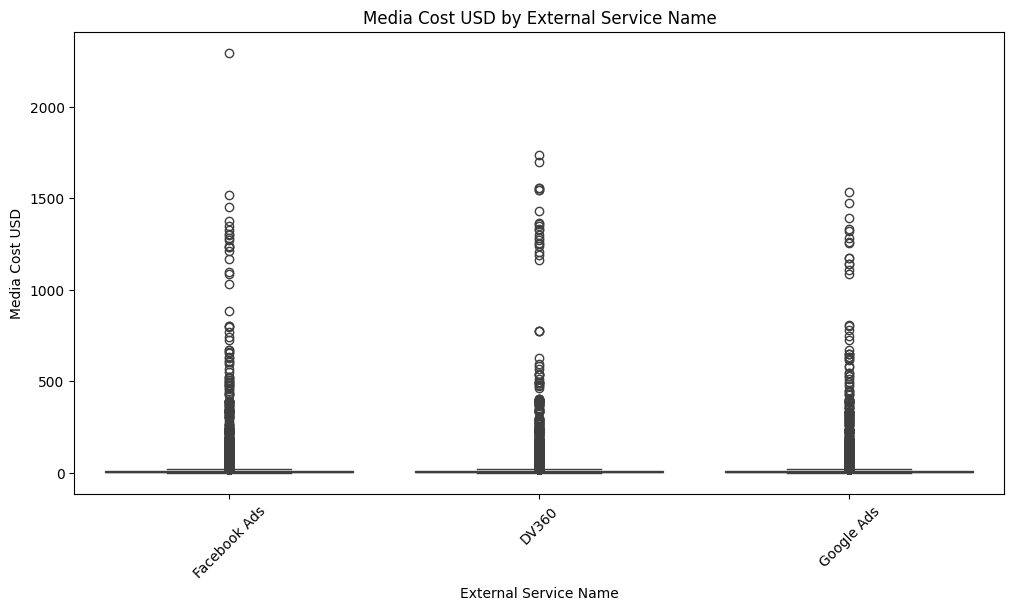

In [57]:
# Boxplot of media_cost_usd by ext_service_name
plt.figure(figsize=(12, 6))
sns.boxplot(x='ext_service_name', y='media_cost_usd', data=df)
plt.title('Media Cost USD by External Service Name')
plt.xlabel('External Service Name')
plt.ylabel('Media Cost USD')
plt.xticks(rotation=45)
plt.show()

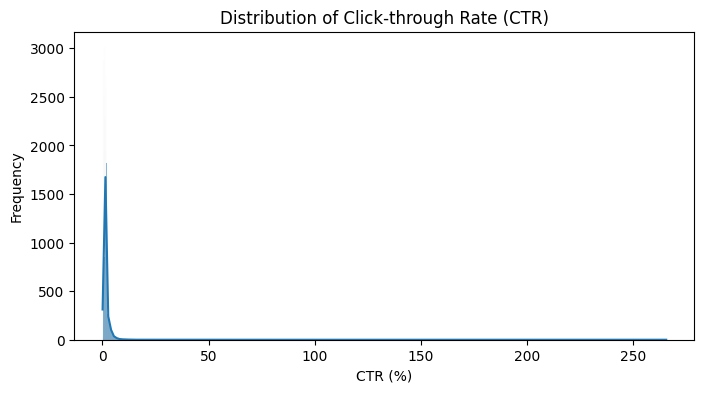

In [58]:
# Click-through Rate (CTR) Analysis
df['CTR'] = (df['clicks'] / df['impressions']) * 100
plt.figure(figsize=(8, 4))
sns.histplot(df['CTR'], kde=True)
plt.title('Distribution of Click-through Rate (CTR)')
plt.xlabel('CTR (%)')
plt.ylabel('Frequency')
plt.show()

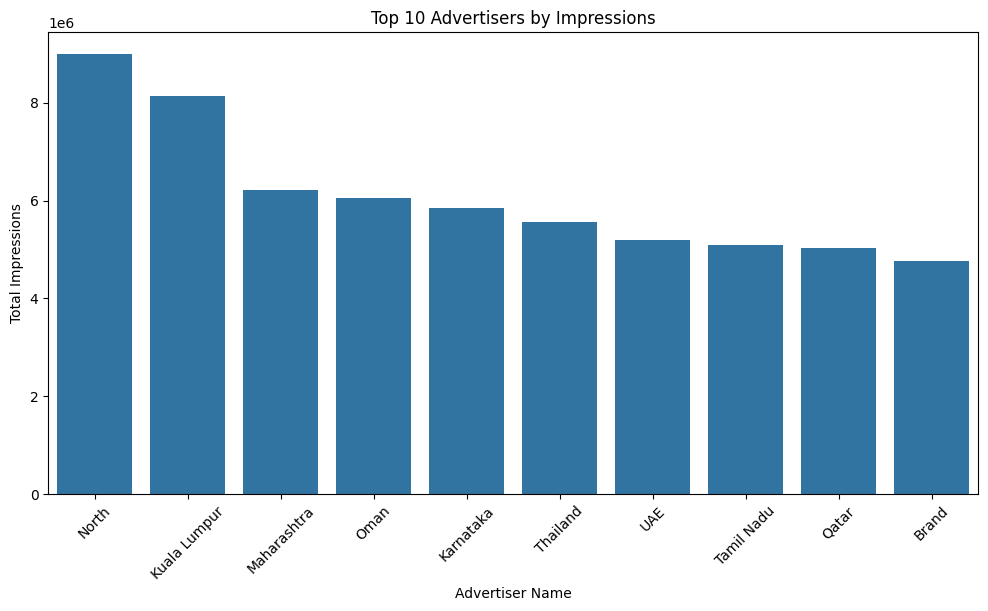

In [59]:
# Top advertisers by impressions
top_advertisers = df.groupby('advertiser_name')['impressions'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_advertisers.index, y=top_advertisers.values)
plt.title('Top 10 Advertisers by Impressions')
plt.xlabel('Advertiser Name')
plt.ylabel('Total Impressions')
plt.xticks(rotation=45)
plt.show()

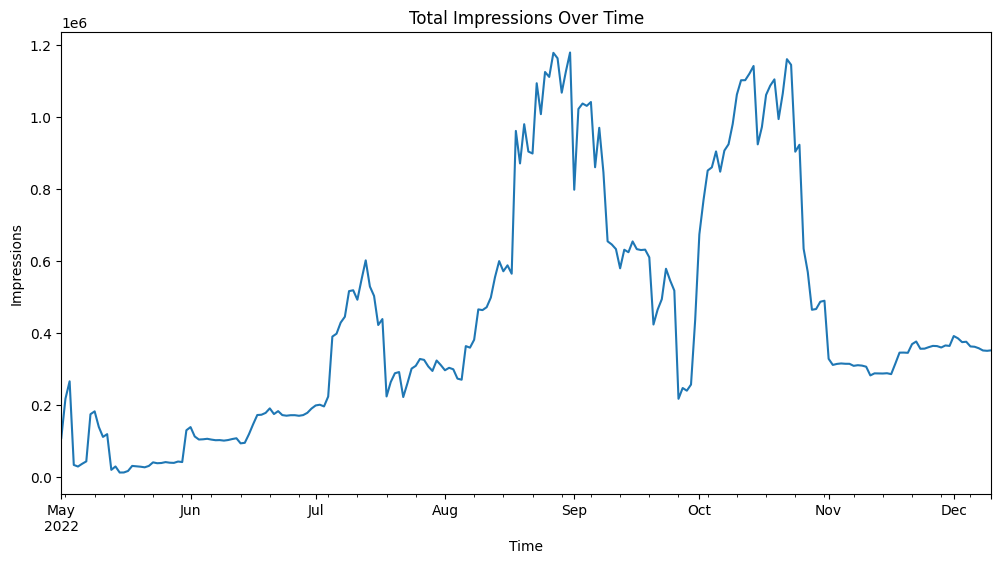

In [60]:
# Impressions over time
df['time'] = pd.to_datetime(df['time'])
impressions_over_time = df.groupby('time')['impressions'].sum()
plt.figure(figsize=(12, 6))
impressions_over_time.plot()
plt.title('Total Impressions Over Time')
plt.xlabel('Time')
plt.ylabel('Impressions')
plt.show()

In [61]:
# Analyze performance by weekday
weekday_performance = df.groupby('weekday_cat')[['impressions', 'clicks']].sum()
weekday_performance['CTR'] = (weekday_performance['clicks'] / weekday_performance['impressions']) * 100
print("\nPerformance by Weekday Category:")
print(weekday_performance)


Performance by Weekday Category:
             impressions   clicks       CTR
weekday_cat                                
week_day        84930469  3299302  3.884710
week_end        14559723   527088  3.620179


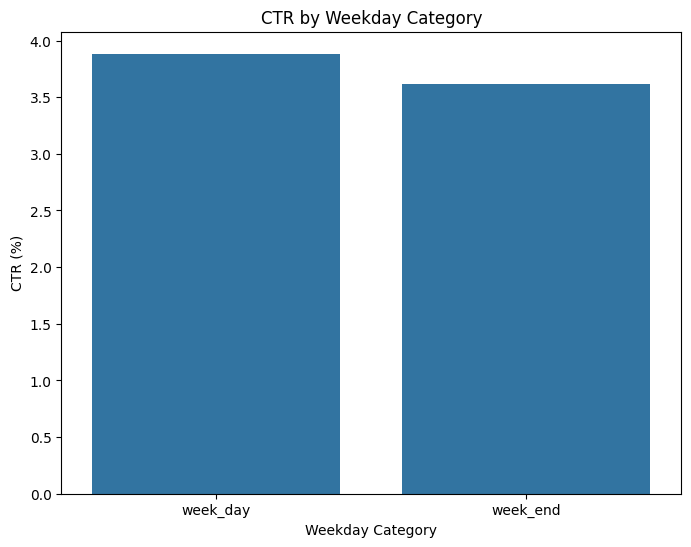

In [62]:
# Visualize CTR by weekday category
plt.figure(figsize=(8, 6))
sns.barplot(x=weekday_performance.index, y=weekday_performance['CTR'])
plt.title('CTR by Weekday Category')
plt.xlabel('Weekday Category')
plt.ylabel('CTR (%)')
plt.show()

In [63]:
# Insights
print("\nKey Insights:")
print("- There is a strong correlation between 'impressions' and 'media_cost_usd', indicating that higher spending leads to more impressions.")
print("- The distribution of 'clicks' is right-skewed, suggesting that most campaigns receive a low number of clicks.")
print("- Weekends ('week_end') have a higher CTR compared to weekdays ('week_day').")
print("- Certain external services have higher media costs, which may impact campaign performance.")


Key Insights:
- There is a strong correlation between 'impressions' and 'media_cost_usd', indicating that higher spending leads to more impressions.
- The distribution of 'clicks' is right-skewed, suggesting that most campaigns receive a low number of clicks.
- Weekends ('week_end') have a higher CTR compared to weekdays ('week_day').
- Certain external services have higher media costs, which may impact campaign performance.
